In [1]:
import pandas as pd
import numpy as np
import os

data_dir = './Data'

pd.set_option('display.max_rows', 150)

<b>Load data</b>

In [2]:
import geopandas as gpd

In [3]:
data_dir = './Data'
df = pd.read_csv(os.path.join(data_dir,'Trade_GDP_CalSuff.csv')).set_index('ISO3').drop(columns=['Unnamed: 0'])
df = df.rename({'GDP_ssp1_2010':'GDP_2010'},axis=1)
df

,Calsuff_2000,Calsuff_ssp1,Calsuff_ssp2,Calsuff_ssp3,Calsuff_ssp4,Calsuff_ssp5,trade_dep_2013,GDP_2010,GDP_ssp1,GDP_ssp2,GDP_ssp3,GDP_ssp4,GDP_ssp5,name,Trade_1998,Trade_2001,Trade_2013
ISO3,,,,,,,,,,,,,,,,,
AFG,0.785233,0.357539,0.302060,0.285515,0.265726,0.462921,0.269311,1.185439,7.525939,4.182579,2.891351,2.616684,9.578814,Afghanistan,0.460374,0.358388,0.269311
AGO,0.597733,0.308747,0.397758,0.200725,0.310365,0.433238,0.221301,5.171680,12.157659,7.386279,4.991539,6.575093,17.175128,Angola,0.337447,0.322696,0.221301
ALB,2.319537,2.144321,2.112085,1.997762,2.156844,2.172469,0.208123,7.660737,23.061599,18.183380,14.094719,18.735353,28.357411,Albania,0.223349,0.197182,0.208123
ARE,0.403014,0.158618,0.152754,0.143927,0.179645,0.109497,0.000000,42.351171,79.490116,71.008454,66.454902,82.191265,100.603637,United Arab Emirates,0.000000,0.000000,0.000000
ARG,8.343864,5.579006,6.409942,6.254420,5.945893,6.103357,1.000000,14.362739,46.757355,38.709480,27.858774,37.097542,56.844817,Argentina,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,1.306412,0.887877,1.035278,1.041431,0.920984,0.990350,0.590617,2.844948,21.293228,15.352533,11.153305,15.721374,26.969306,Vietnam,0.596365,0.588191,0.590617
YEM,0.273570,0.148041,0.119826,0.158879,0.109572,0.147259,0.041852,2.372926,8.584981,6.566320,4.280249,3.977799,10.390752,Yemen,0.104230,0.084691,0.041852
ZAF,1.681635,1.450347,1.536092,4.146097,1.423558,1.305191,0.433191,9.470030,33.277364,27.540868,20.898775,27.538970,39.485362,South Africa,0.500649,0.499329,0.433191


<b>Modeling</b>

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df['log_GDP_2010'] = df['GDP_2010'].apply(lambda x:np.log(x))
df = df.dropna()

In [6]:
X = df[['Calsuff_2000','log_GDP_2010']]  
y = df['Trade_2001'] 

X_train, X_test, y_train, y_pred= train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
for i in np.arange(1,6):
    df['log_GDP_ssp'+str(i)] = df['GDP_ssp'+str(i)].apply(lambda x:np.log(x))

<ipython-input-8-6d25af35e05b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_GDP_ssp'+str(i)] = df['GDP_ssp'+str(i)].apply(lambda x:np.log(x))


In [9]:
df

,Calsuff_2000,Calsuff_ssp1,Calsuff_ssp2,Calsuff_ssp3,Calsuff_ssp4,Calsuff_ssp5,trade_dep_2013,GDP_2010,GDP_ssp1,GDP_ssp2,...,name,Trade_1998,Trade_2001,Trade_2013,log_GDP_2010,log_GDP_ssp1,log_GDP_ssp2,log_GDP_ssp3,log_GDP_ssp4,log_GDP_ssp5
ISO3,,,,,,,,,,,,,,,,,,,,,
AFG,0.785233,0.357539,0.302060,0.285515,0.265726,0.462921,0.269311,1.185439,7.525939,4.182579,...,Afghanistan,0.460374,0.358388,0.269311,0.170113,2.018356,1.430928,1.061724,0.961908,2.259554
AGO,0.597733,0.308747,0.397758,0.200725,0.310365,0.433238,0.221301,5.171680,12.157659,7.386279,...,Angola,0.337447,0.322696,0.221301,1.643198,2.497959,1.999624,1.607744,1.883289,2.843462
ALB,2.319537,2.144321,2.112085,1.997762,2.156844,2.172469,0.208123,7.660737,23.061599,18.183380,...,Albania,0.223349,0.197182,0.208123,2.036108,3.138169,2.900508,2.645800,2.930412,3.344888
ARE,0.403014,0.158618,0.152754,0.143927,0.179645,0.109497,0.000000,42.351171,79.490116,71.008454,...,United Arab Emirates,0.000000,0.000000,0.000000,3.745996,4.375633,4.262799,4.196524,4.409049,4.611188
ARG,8.343864,5.579006,6.409942,6.254420,5.945893,6.103357,1.000000,14.362739,46.757355,38.709480,...,Argentina,1.000000,1.000000,1.000000,2.664637,3.844972,3.656085,3.327148,3.613551,4.040325
ARM,1.734574,1.798140,1.967693,1.696076,1.924673,2.131634,0.124763,4.900712,23.176016,16.818042,...,Armenia,0.144348,0.167235,0.124763,1.589380,3.143118,2.822452,2.534586,2.895610,3.367218
AUS,11.085546,5.154391,5.066072,8.800898,6.656228,4.108241,1.000000,35.727861,66.798098,59.149557,...,Australia,1.000000,1.000000,1.000000,3.575931,4.201675,4.080069,4.003397,4.238384,4.342543
AUT,2.824697,2.560388,2.677088,2.420327,2.609182,2.175140,0.326643,35.364546,62.057954,60.917517,...,Austria,0.472484,0.503460,0.326643,3.565710,4.128069,4.109521,4.022241,4.170904,4.261119
AZE,2.154729,1.735103,1.762769,1.698961,1.728537,1.753897,0.221751,8.782760,17.689485,14.131447,...,Azerbaijan,0.294230,0.303214,0.221751,2.172791,2.872970,2.648403,2.417148,2.733016,3.108171


In [10]:
for i in np.arange(1,6):
    df['Trade_lm_predicted_ssp'+str(i)] = regressor.predict(df[['Calsuff_ssp'+str(i),'log_GDP_ssp'+str(i)]])

<ipython-input-10-51ade3a3b942>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trade_lm_predicted_ssp'+str(i)] = regressor.predict(df[['Calsuff_ssp'+str(i),'log_GDP_ssp'+str(i)]])
<ipython-input-10-51ade3a3b942>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trade_lm_predicted_ssp'+str(i)] = regressor.predict(df[['Calsuff_ssp'+str(i),'log_GDP_ssp'+str(i)]])
<ipython-input-10-51ade3a3b942>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

<b>Comparing Predicted Trade Independency to 2013 Value</b>

In [11]:
df[['Trade_lm_predicted_ssp1', 'Trade_lm_predicted_ssp2', 'Trade_lm_predicted_ssp3','Trade_lm_predicted_ssp4','Trade_lm_predicted_ssp5','Trade_2013','name']]

,Trade_lm_predicted_ssp1,Trade_lm_predicted_ssp2,Trade_lm_predicted_ssp3,Trade_lm_predicted_ssp4,Trade_lm_predicted_ssp5,Trade_2013,name
ISO3,,,,,,,
AFG,0.225719,0.249804,0.266584,0.269748,0.223232,0.269311,Afghanistan
AGO,0.197622,0.230249,0.231977,0.228172,0.191688,0.221301,Angola
ALB,0.330451,0.339318,0.341672,0.341850,0.322748,0.208123,Albania
ARE,0.091288,0.096344,0.098831,0.091519,0.075234,0.000000,United Arab Emirates
ARG,0.603292,0.687100,0.689434,0.647618,0.640619,1.000000,Argentina
ARM,0.299183,0.330239,0.320137,0.322765,0.317984,0.124763,Armenia
AUS,0.547595,0.545695,0.884189,0.680368,0.446875,1.000000,Australia
AUT,0.318771,0.330147,0.311454,0.321025,0.277665,0.326643,Austria
AZE,0.306897,0.320484,0.326205,0.313231,0.296946,0.221751,Azerbaijan


<b>Map</b>

In [12]:
import geopandas
import matplotlib.pyplot as plt
import matplotlib.colors
#import geoplot

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.set_index("iso_a3").merge(df)

In [13]:
# Colormap
levels = [0, 0.2, 0.4, 0.6, 0.8, 0.99,1.01]
colors = ['#dadaeb', '#9e9ac8', '#756bb1', '#54278f','#3f007d','black']
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)

ImportError: The descartes package is required for plotting polygons in geopandas.

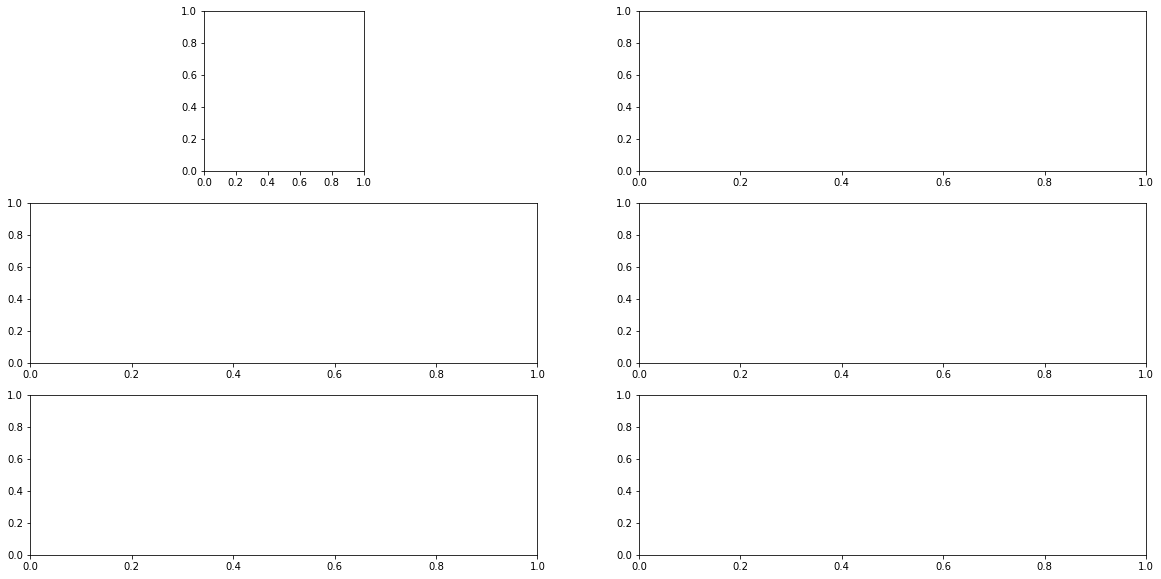

In [14]:
# Map predicted Trade 2050 and Trade 2013.

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20, 10))

world.plot(column='Trade_lm_predicted_ssp1', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,0])#, edgecolor=’0.8')
axes[0,0].set_title('Approximated trade Indep SSP1 2050', fontdict={'fontsize':'16'});
axes[0,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp2', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,0])#, edgecolor=’0.8')
axes[1,0].set_title('Approximated trade Indep SSP2 2050', fontdict={'fontsize':'16'});
axes[1,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp3', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,0])#, edgecolor=’0.8')
axes[2,0].set_title('Approximated trade Indep SSP3 2050', fontdict={'fontsize':'16'});
axes[2,0].axis('off');


world.plot(column='Trade_lm_predicted_ssp4', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,1])#, edgecolor=’0.8')
axes[0,1].set_title('Approximated trade Indep SSP4 2050', fontdict={'fontsize':'16'});
axes[0,1].axis('off');

world.plot(column='Trade_lm_predicted_ssp5', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,1])#, edgecolor=’0.8')
axes[1,1].set_title('Approximated trade Indep SSP5 2050', fontdict={'fontsize':'16'});
axes[1,1].axis('off');

world.plot(column='Trade_2013', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,1])#, edgecolor=’0.8')
axes[2,1].set_title('Trade indep 2013 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[2,1].axis('off');